# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [ ]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [146]:
data = pd.read_csv("train.csv")

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [147]:
teach_data = data.sample(frac = 0.7)
test_data = data.drop(teach_data.index)

In [148]:
display(teach_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
...,...,...,...,...,...,...,...,...,...,...,...,...
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S


In [149]:
display(test_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [150]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [151]:
train_features, train_target = get_features_and_target(teach_data) 
test_features, test_targets = get_features_and_target(test_data)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

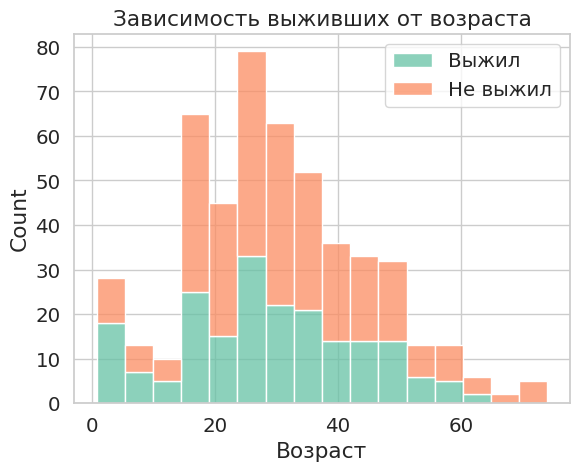

In [152]:
sns.histplot(data = teach_data, x = 'Age', hue = 'Survived', multiple = "stack", palette = ["C1", "C0"])
plt.title("Зависимость выживших от возраста")
plt.xlabel("Возраст")
plt.legend(["Выжил", "Не выжил"])

Больше всего в крушении погибли молодые люды в возрасте от 20 до 30. Количество детей и пожылых
людей тоже не мало, так как в эвакуационных моментах больше всего сначала спасают женщин и детей.

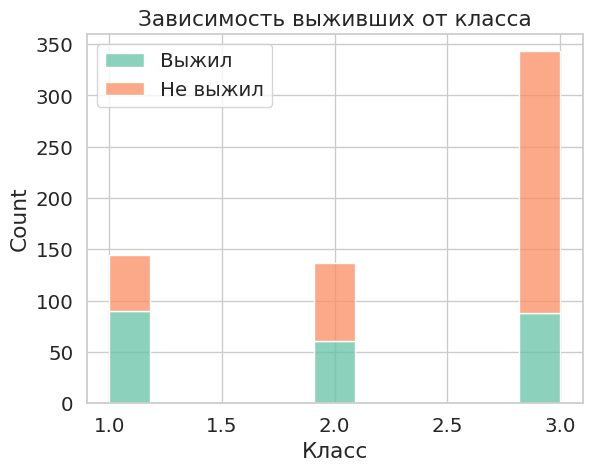

In [153]:
sns.histplot(data = teach_data, x = 'Pclass', hue = 'Survived', multiple = "stack", palette = ["C1", "C0"])
plt.xlabel("Класс")
plt.title("Зависимость выживших от класса")
plt.legend(["Выжил", "Не выжил"])

График показывает, что больше всего выживали люди с первого класса. Но количество погибших с третьего класса больше всего, так как по техническим трудно добираться до выхода в спасательную шлюпку.

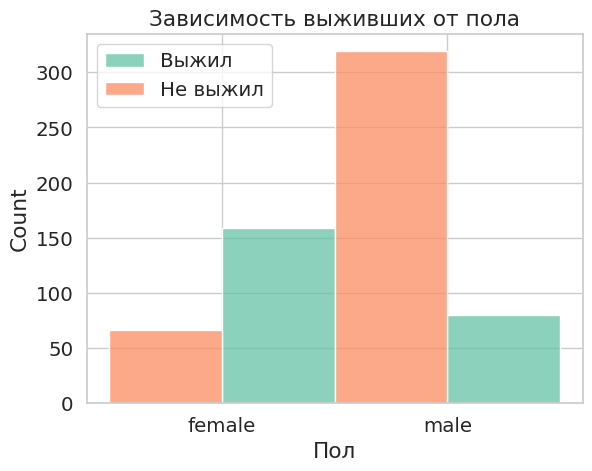

In [154]:
sns.histplot(data = teach_data, x = 'Sex', hue = 'Survived', multiple = "dodge", palette = ["C1", "C0"])
plt.xlabel("Пол")
plt.title("Зависимость выживших от пола")
plt.legend(["Выжил", "Не выжил"])

Количество выживших женщин тоже больше мужчин, так как в момент эвакуации сначала сажали в шлюпку женщин и детей.

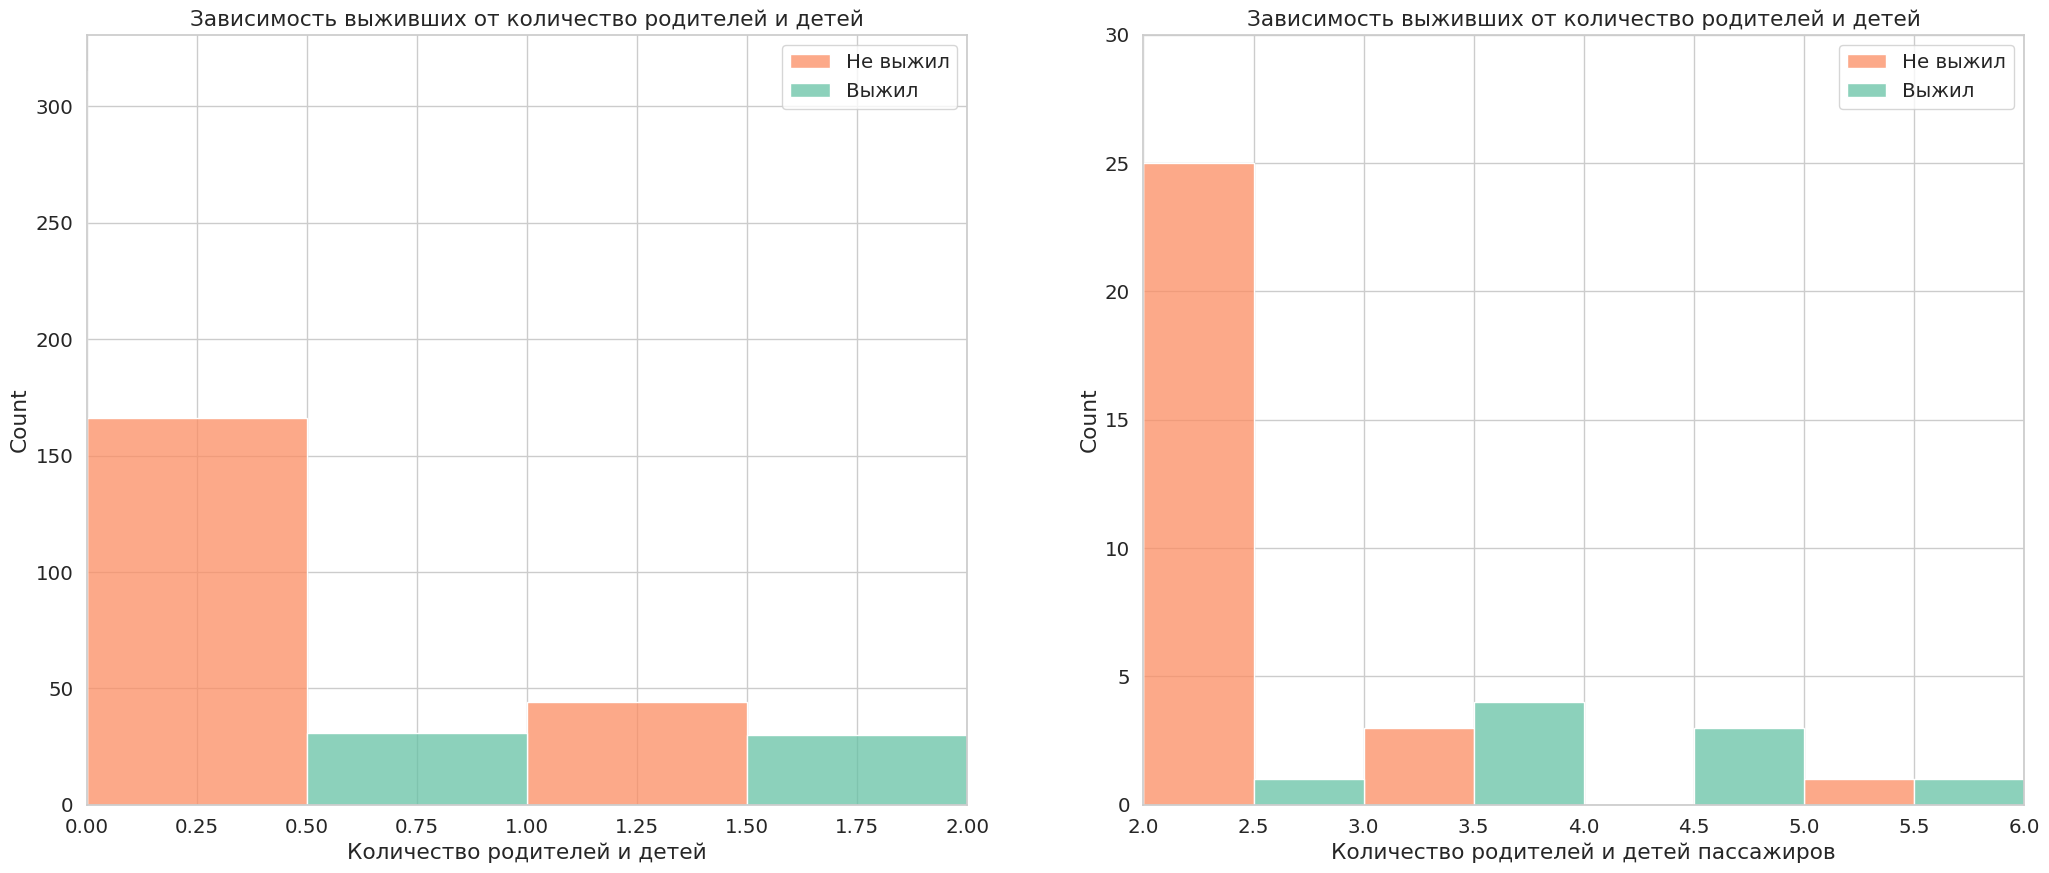

In [155]:
figure, ax = plt.subplots(ncols=2, figsize=(25, 10))
sns.histplot(data = teach_data, x = 'Parch', ax=ax[0], hue = 'Survived', multiple="dodge", discrete=True)
sns.histplot(data = teach_data, x = 'Parch', ax=ax[1], hue = 'Survived', multiple="dodge", discrete=True)
ax[0].set_xlabel("Количество родителей и детей")
ax[0].set_title("Зависимость выживших от количество родителей и детей")
ax[0].legend(["Не выжил", "Выжил"])
ax[0].set_xlim(0, 2)
ax[1].set_xlim(2.0, 6.0)
ax[1].set_ylim(0, 30)
plt.xlabel("Количество родителей и детей пассажиров")
plt.title("Зависимость выживших от количество родителей и детей")
plt.legend(["Не выжил", "Выжил"])

(0.0, 20.0)

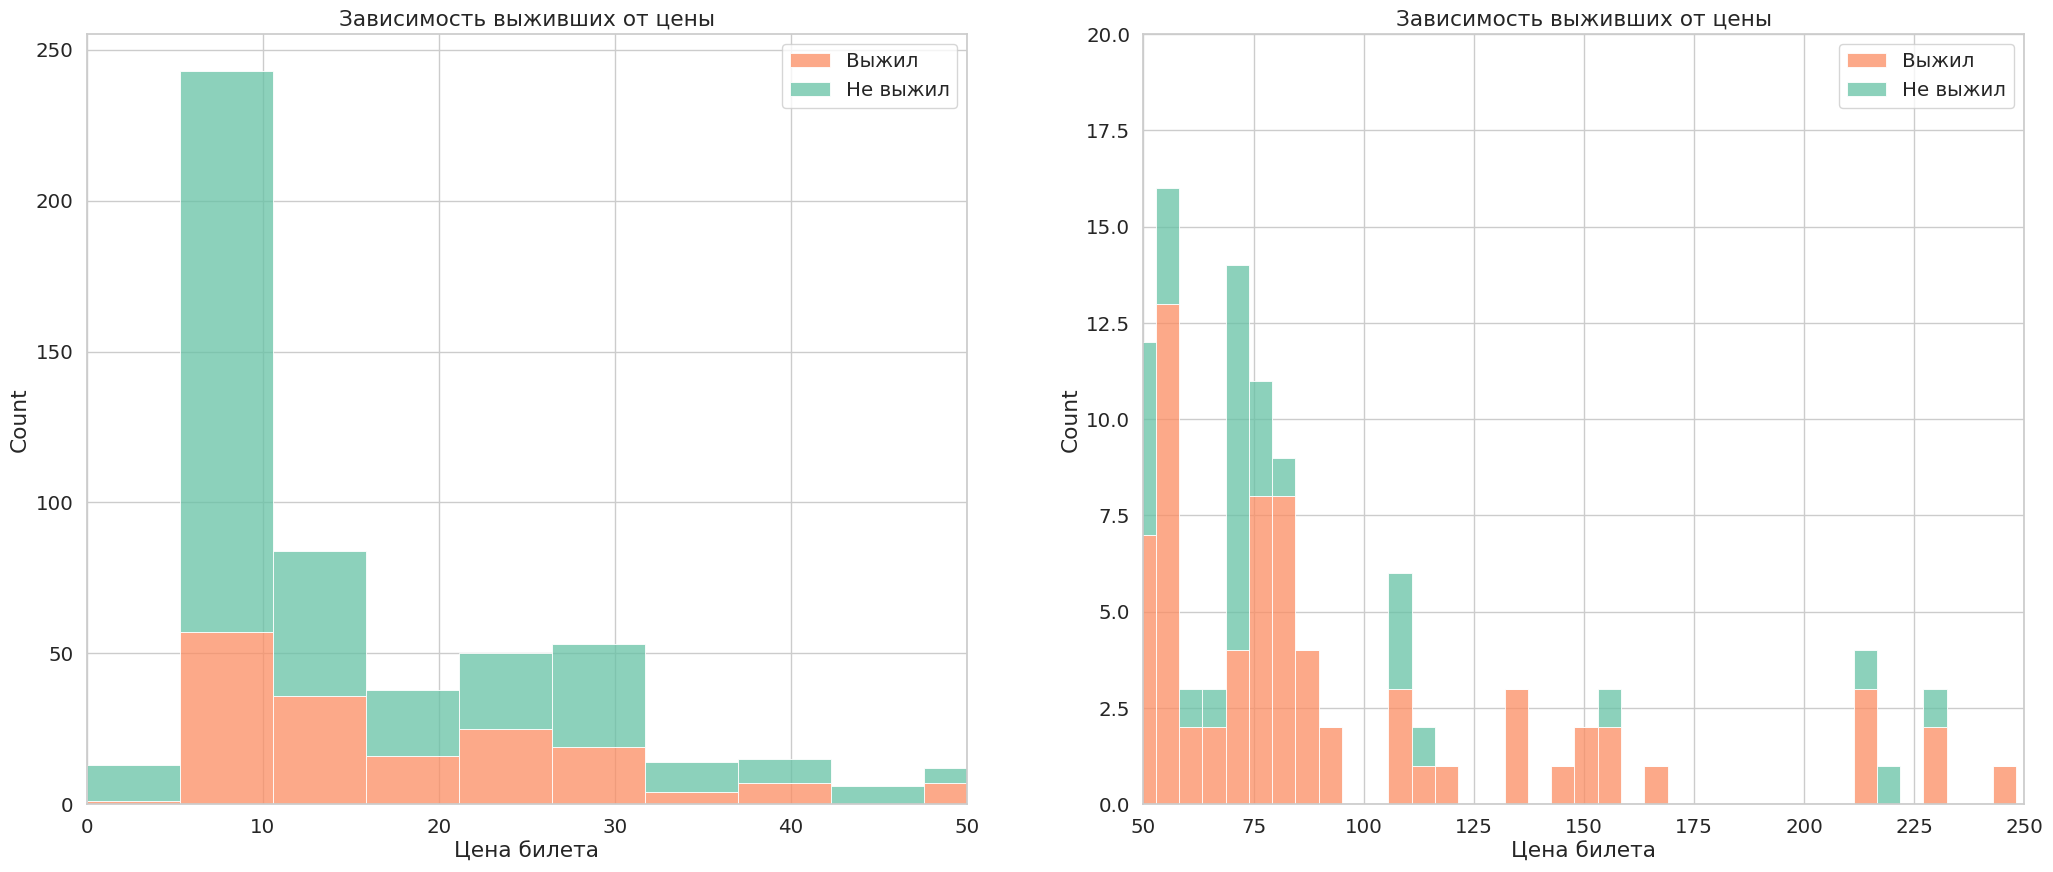

In [156]:
figure, ax = plt.subplots(ncols=2, figsize = (25, 10))
sns.histplot(data = teach_data, x = 'Fare', hue = 'Survived', multiple = "stack", ax = ax[0])
sns.histplot(data = teach_data, x = 'Fare', hue = 'Survived', multiple = "stack", ax = ax[1])
plt.xlabel("Цена билета")
plt.title("Зависимость выживших от цены")
plt.legend(["Выжил", "Не выжил"])
ax[0].set_xlabel("Цена билета")
ax[0].set_title("Зависимость выживших от цены")
ax[0].legend(["Выжил", "Не выжил"])
ax[0].set_xlim(0, 50)
ax[1].set_xlim(50, 250)
ax[1].set_ylim(0, 20.0)

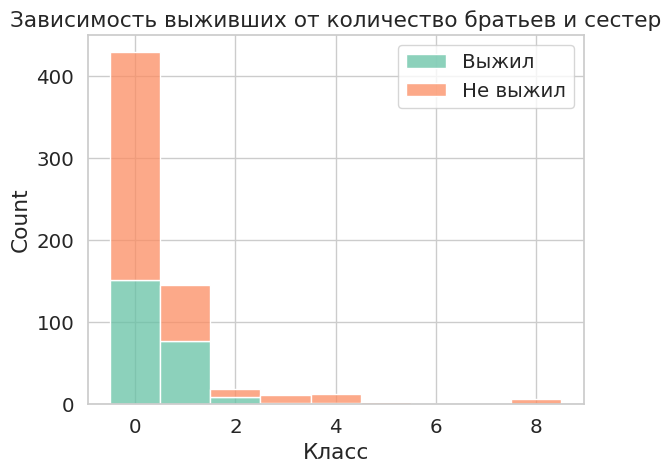

In [157]:
sns.histplot(data = teach_data, x = 'SibSp', discrete = True, hue = 'Survived', multiple = "stack", palette = ["C1", "C0"])
plt.xlabel("Класс")
plt.title("Зависимость выживших от количество братьев и сестер")
plt.legend(["Выжил", "Не выжил"])

In [158]:
def tree_fare(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    
    predicted = pd.Series(features['Fare'] > 25)
    return predicted


In [159]:
def tree_sex(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = (features['Sex'] == "female") | (features['Age'] <= 10)
    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**
Рассмотрет отношение данные деревья с табличными данными.

Реализуйте данный критерий по шаблону

In [160]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    return predicted.sum() / target.sum()



Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [161]:
criteria(test_targets, tree_fare(test_features))

0.9902912621359223

In [162]:
criteria(test_targets, tree_sex(test_features))

0.970873786407767

**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [163]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    return 0

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

#### 6. Выводы

По построенным гистограммам и реализации криетрии (хоть оценка очень грубая), получили основные данные о выживаемости. Так же построили деревья, и проверка результата, которые показали очень близкие значения, и оценку зависимости того,  что от каких-то главных факторов человек виживет, или нет. 


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

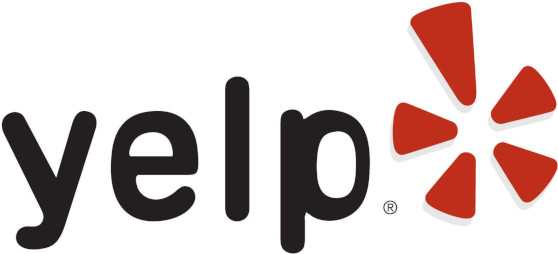

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [204]:
data = pd.read_csv('yelp_business.csv')
data.head(10)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,1,Italian;Restaurants
6,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...
7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods
8,8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,1,Automotive;Auto Detailing


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [205]:
data_1 = data.groupby(by = 'city')['business_id']
data_2 = data_1.count()
data_3 = data_2.sort_values(ascending = False)
data_3.head()

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: business_id, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

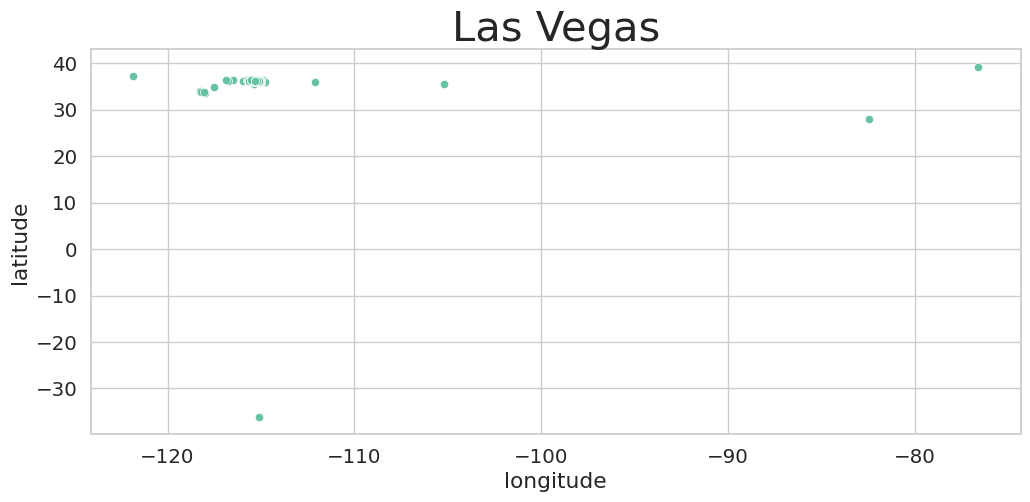

In [206]:
def charting(new):
    sns.plotting_context("paper", font_scale=2), sns.axes_style("whitegrid"),
    plt.figure(figsize = (12, 5))
    sns.scatterplot(y = new.latitude, x = new.longitude, alpha=1, color='C0')
    plt.title("Las Vegas", fontsize=30)

data = data[data.city == 'Las Vegas'].reset_index().drop("index", axis=1)
charting(data)

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [ ]:
...

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
...

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
...

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
...

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
...

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
...

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
...

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
...

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [ ]:
...

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
...

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>